In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Step 1: Load the dataset
df = pd.read_csv("50_Startups_Missing.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,NaN,California,191792.06
2,153441.51,NaN,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,NaN,NaN,1903.93,New York,64926.08
46,1315.46,NaN,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,NaN,California,NaN


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        45 non-null     float64
 1   Administration   45 non-null     float64
 2   Marketing Spend  45 non-null     float64
 3   State            48 non-null     object 
 4   Profit           45 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
print(df.shape)

(50, 5)


In [8]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            R&D Spend  Administration  Marketing Spend         Profit
count      45.000000       45.000000        45.000000      45.000000
mean    75508.400222   122380.826444    212369.986444  113954.140889
std     46628.533389    27755.920185    115436.817810   39329.036239
min         0.000000    51283.140000         0.000000   35673.410000
25%     44069.950000   105751.030000    137962.620000   90708.190000
50%     73994.560000   122782.750000    214634.810000  107404.340000
75%    114523.610000   145077.580000    298664.470000  144259.400000
max    165349.200000   182645.560000    471784.100000  192261.830000


In [9]:
missing_values = df.isnull().sum()
print("Missing values before imputation:\n", missing_values)

Missing values before imputation:
 R&D Spend          5
Administration     5
Marketing Spend    5
State              2
Profit             5
dtype: int64


In [ ]:
#Step 2: Handle missing values
# Filling numerical missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)
# Filling categorical missing values with mode
df['State'].fillna(df['State'].mode()[0], inplace=True)

In [12]:
missing_values = df.isnull().sum()
print("Missing values after imputation:\n", missing_values)

Missing values after imputation:
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


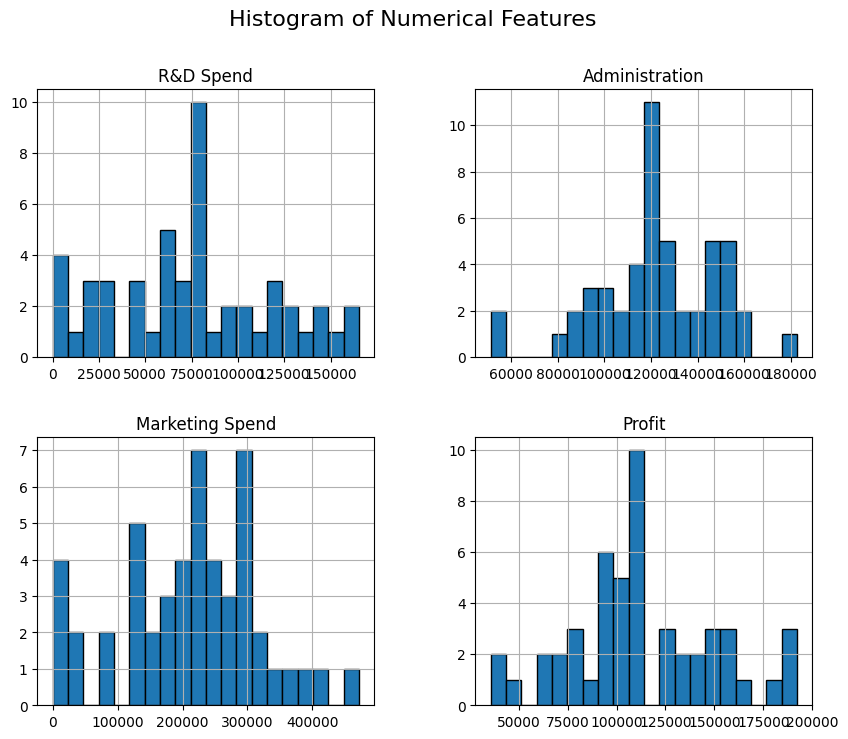


Interpretation:
The histograms show the distribution of numerical variables, helping us understand their spread and skewness.
R&D Spend: The highest expenditure on R&D is $165,349.20, while the lowest is $0.
Administration: The highest expenditure is $182,645.56, and the lowest is $51,283.14.
Marketing Spend: The highest expenditure is $471,784.10, and the lowest is $0.
Profit: The highest profit recorded is $192,261.83, while the lowest is $35,673.41.
Most expenditures are concentrated around the mean, but R&D and Marketing Spend have a wider spread.


In [37]:
# Histogram for each numerical column
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()
print("\nInterpretation:")
print("The histograms show the distribution of numerical variables, helping us understand their spread and skewness.")
print("R&D Spend: The highest expenditure on R&D is $165,349.20, while the lowest is $0.")
text = """Administration: The highest expenditure is $182,645.56, and the lowest is $51,283.14.
Marketing Spend: The highest expenditure is $471,784.10, and the lowest is $0.
Profit: The highest profit recorded is $192,261.83, while the lowest is $35,673.41.
Most expenditures are concentrated around the mean, but R&D and Marketing Spend have a wider spread."""
print(text)


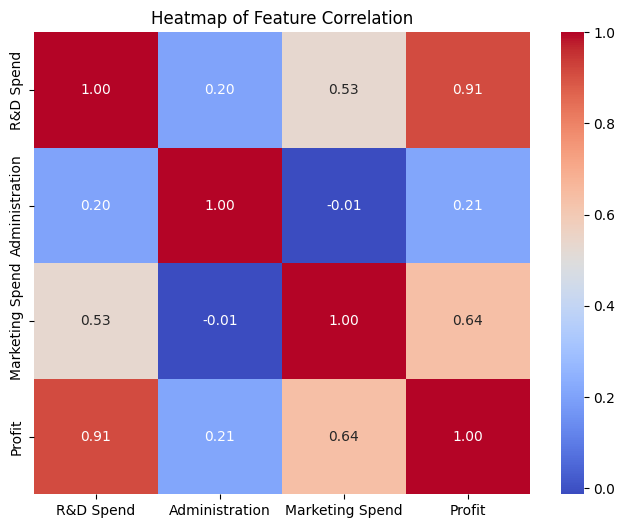


Interpretation:
The heatmap indicates how variables are correlated. A high correlation between R&D Spend and Profit suggests a strong linear relationship.
R&D Spend vs Profit: Strong positive correlation (0.9116) → Higher spending on R&D is strongly linked to higher profits.
Marketing Spend vs Profit: Moderate positive correlation (0.6366) → Marketing investment has a significant but weaker influence on profit than R&D.
Administration vs Profit: Weak positive correlation (0.2117) → Administrative expenses do not significantly impact profit.
R&D Spend vs Marketing Spend: Moderate correlation (0.5307) → Companies investing heavily in R&D also tend to spend more on marketing.


In [38]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Feature Correlation")
plt.show()
print("\nInterpretation:")
print("The heatmap indicates how variables are correlated. A high correlation between R&D Spend and Profit suggests a strong linear relationship.")
text = """R&D Spend vs Profit: Strong positive correlation (0.9116) → Higher spending on R&D is strongly linked to higher profits.
Marketing Spend vs Profit: Moderate positive correlation (0.6366) → Marketing investment has a significant but weaker influence on profit than R&D.
Administration vs Profit: Weak positive correlation (0.2117) → Administrative expenses do not significantly impact profit.
R&D Spend vs Marketing Spend: Moderate correlation (0.5307) → Companies investing heavily in R&D also tend to spend more on marketing."""
print(text)


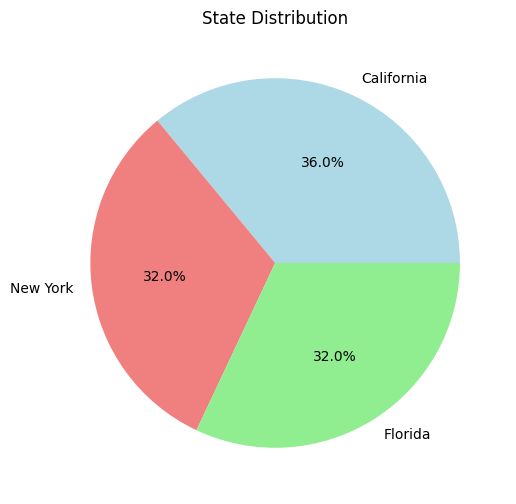

In [11]:
# --- Pie Chart (State Distribution) ---
plt.figure(figsize=(6, 6))
df['State'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("State Distribution")
plt.ylabel("")  # Hide y-label
plt.show()

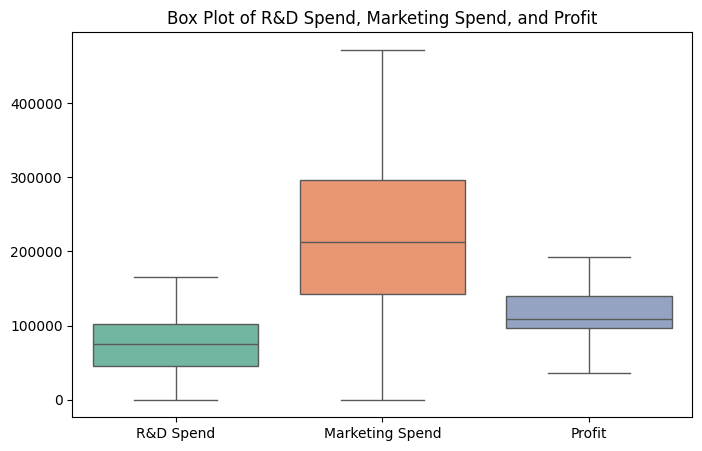

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['R&D Spend', 'Marketing Spend', 'Profit']], palette="Set2")
plt.title("Box Plot of R&D Spend, Marketing Spend, and Profit")
plt.show()

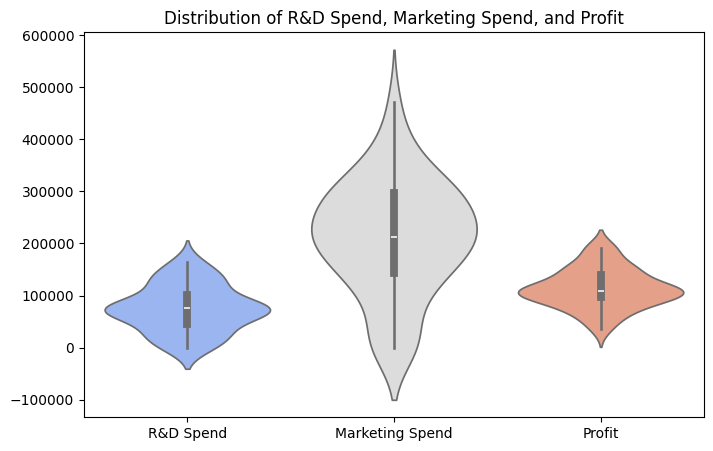

In [14]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[['R&D Spend', 'Marketing Spend', 'Profit']], palette="coolwarm")
plt.title("Distribution of R&D Spend, Marketing Spend, and Profit")
plt.show()

In [15]:
# Step 4: Define Dependent and Independent Variables
X = df[['R&D Spend']]
y = df['Profit']

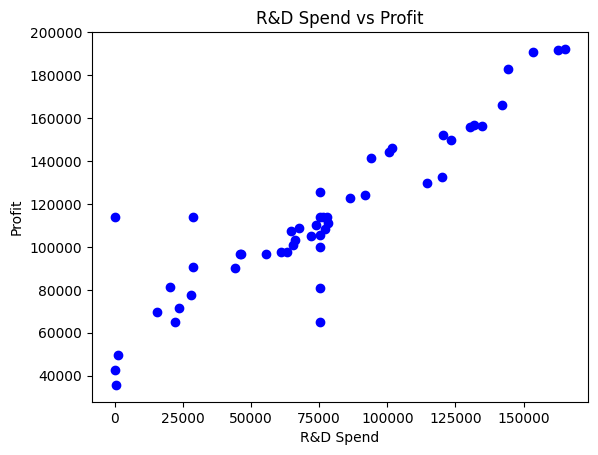

Interpretation
R&D Spend vs Profit:
Most startups spending between $50,000 and $150,000 on R&D have profits ranging from $80,000 to $180,000.
Some startups spending very little on R&D ($0-$20,000) report significantly lower profits, around $40,000-$60,000.
The relationship is strong, meaning higher R&D investment leads to higher profit.


In [40]:
# Step 5: Visualize Relationship between Variables
plt.scatter(X, y, color='blue')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit')
plt.show()
print("Interpretation")
text = """R&D Spend vs Profit:
Most startups spending between $50,000 and $150,000 on R&D have profits ranging from $80,000 to $180,000.
Some startups spending very little on R&D ($0-$20,000) report significantly lower profits, around $40,000-$60,000.
The relationship is strong, meaning higher R&D investment leads to higher profit."""
print(text)

In [17]:
# Step 6: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Train set shape: (40, 1), Test set shape: (10, 1)


In [18]:
# Step 7: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
# Step 8: Retrieve Model Parameters
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}, Slope: {slope}")
print("Interpretation")
text = """Intercept (60,484.33): If a company spends $0 on R&D, it is predicted to have a baseline profit of $60,484.33.
Slope (0.7479): For every $1 increase in R&D spend, the profit increases by $0.75 (on average)."""
print(text)

Intercept: 60484.3346687522, Slope: 0.74790455052762
Interpretation
Intercept (60,484.33): If a company spends $0 on R&D, it is predicted to have a baseline profit of $60,484.33.
Slope (0.7479): For every $1 increase in R&D spend, the profit increases by $0.75 (on average).


In [20]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [43]:
# Step 10: Evaluation of the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [44]:
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R^2 Score: {r2}")
print("Interpretation")
text = """Mean Absolute Error (MAE): $16,698.94 → On average, predictions deviate from actual values by around $16,699.
Mean Squared Error (MSE): $524,549,413.04 → Measures squared deviations (higher indicates more significant errors).
Root Mean Squared Error (RMSE): $22,903.04 → Average error magnitude; lower is better.
R² Score: 0.2475 (Very Low) → The model explains only 24.75% of the variance in Profit, meaning factors beyond R&D Spend (such as Marketing Spend, competition, industry trends, etc.) play a significant role in determining profit.."""
print(text)

MAE: 16698.941386017737, MSE: 524549413.0389849, RMSE: 22903.04375053641, R^2 Score: 0.24749120655357681
Interpretation
Mean Absolute Error (MAE): $16,698.94 → On average, predictions deviate from actual values by around $16,699.
Mean Squared Error (MSE): $524,549,413.04 → Measures squared deviations (higher indicates more significant errors).
Root Mean Squared Error (RMSE): $22,903.04 → Average error magnitude; lower is better.
R² Score: 0.2475 (Very Low) → The model explains only 24.75% of the variance in Profit, meaning factors beyond R&D Spend (such as Marketing Spend, competition, industry trends, etc.) play a significant role in determining profit..


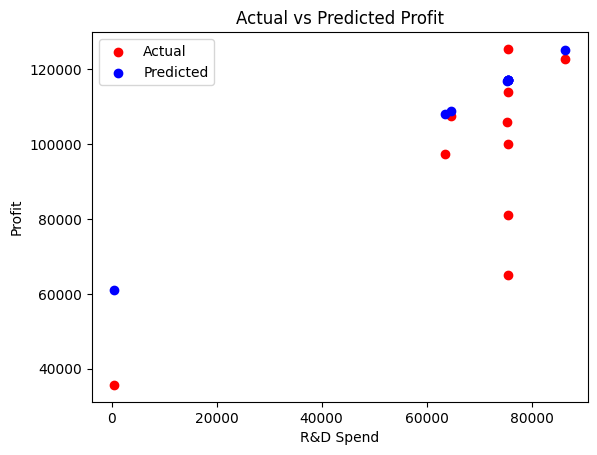

Interpretation
Actual vs Predicted Profit::
The predicted profit values (blue dots) align somewhat with the actual profits (red dots), but there is notable variance.
The model tends to underestimate or overestimate profits for some startups, indicating that other factors (beyond R&D Spend) might be influencing profit.


In [41]:
# Step 11: Visualization of Predictions
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Actual vs Predicted Profit')
plt.legend()
plt.show()
print("Interpretation")
text = """Actual vs Predicted Profit::
The predicted profit values (blue dots) align somewhat with the actual profits (red dots), but there is notable variance.
The model tends to underestimate or overestimate profits for some startups, indicating that other factors (beyond R&D Spend) might be influencing profit."""
print(text)

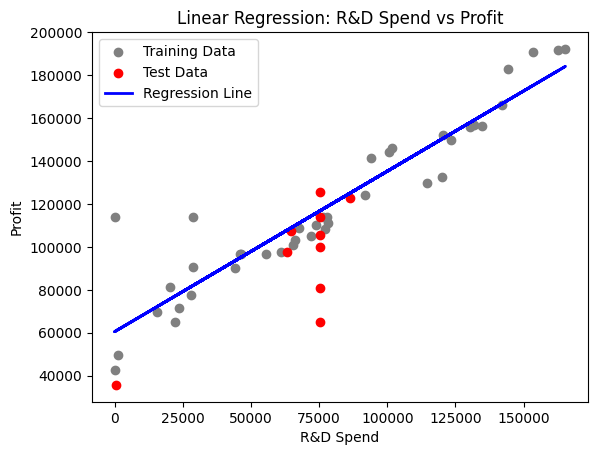


Interpretation:
The regression line represents the best-fit linear relationship between R&D Spend and Profit.
Data points close to the line indicate a strong prediction, while scattered points suggest variance in predictions.


In [26]:
# Step 12: Plot the Regression Line
plt.scatter(X_train, y_train, color='gray', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, model.predict(X_train), color='blue', linewidth=2, label='Regression Line')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Linear Regression: R&D Spend vs Profit')
plt.legend()
plt.show()
print("\nInterpretation:")
print("The regression line represents the best-fit linear relationship between R&D Spend and Profit.")
print("Data points close to the line indicate a strong prediction, while scattered points suggest variance in predictions.")


In [45]:
print("Interpretation:")
text = """The model shows a strong correlation between R&D Spend and Profit, but the low R² score suggests other variables significantly impact profit.
Marketing Spend also plays a role, but Administrative Expenses have little influence.
The model can provide rough estimates but is not highly reliable for precise predictions, suggesting the need for a multiple regression approach incorporating additional features"""
print(text)

Interpretation:
The model shows a strong correlation between R&D Spend and Profit, but the low R² score suggests other variables significantly impact profit.
Marketing Spend also plays a role, but Administrative Expenses have little influence.
The model can provide rough estimates but is not highly reliable for precise predictions, suggesting the need for a multiple regression approach incorporating additional features
